미세먼지 데이터 확인

In [1]:
import pandas as pd
dust = pd.read_excel('/content/dust.xlsx')
dust.head()

,날짜,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
0,2021-01-01 01,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01 02,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01 03,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01 04,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01 05,0.004,0.5,0.010,0.026,NaN,14.0


PM10 : 1000분의 10mm보다 작은 먼지의 공기 중 농도(미세먼지)

In [2]:
dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      744 non-null    object 
 1   아황산가스   740 non-null    float64
 2   일산화탄소   740 non-null    float64
 3   오존      740 non-null    float64
 4   이산화질소   740 non-null    float64
 5   PM10    725 non-null    float64
 6   PM2.5   739 non-null    float64
dtypes: float64(6), object(1)
memory usage: 40.8+ KB


In [3]:
dust.describe()

,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
count,740.000000,740.000000,740.000000,740.000000,725.000000,739.000000
mean,0.003654,0.563243,0.014154,0.030422,33.325517,21.833559
std,0.000628,0.164593,0.010689,0.014664,19.930029,12.222892
min,0.002000,0.300000,0.001000,0.006000,3.000000,3.000000
25%,0.003000,0.400000,0.003000,0.017000,20.000000,13.000000
50%,0.004000,0.500000,0.014000,0.030000,29.000000,19.000000
75%,0.004000,0.700000,0.024000,0.043000,43.000000,29.000000
max,0.006000,1.200000,0.037000,0.063000,163.000000,72.000000


In [5]:
# 한글컬럼을 영문으로 변환
dust.columns=['date','so2','co','o3','no2','PM10', 'PM2.5']
dust.head()

,date,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01 01,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01 02,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01 03,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01 04,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01 05,0.004,0.5,0.010,0.026,NaN,14.0


In [12]:
dust.date[0][:-3]  # 데이터 한개
dust.date.str[:-3] # 전체데이터
dust.date.apply(lambda x : x[:-3]) # 전체데이터

0      2021-01-01
1      2021-01-01
2      2021-01-01
3      2021-01-01
4      2021-01-01
          ...    
739    2021-01-31
740    2021-01-31
741    2021-01-31
742    2021-01-31
743    2021-01-31
Name: date, Length: 744, dtype: object

In [13]:
dust.date = dust.date.str[:-3] # 전체데이터

In [15]:
dust['date'] = pd.to_datetime(dust['date'])
dust.dtypes

date     datetime64[ns]
so2             float64
co              float64
o3              float64
no2             float64
PM10            float64
PM2.5           float64
dtype: object

In [16]:
# 시계열 데이터에서 년 월 일 컬럼을 새롭게 추가

In [17]:
dust['year'] = dust['date'].dt.year
dust['month'] = dust['date'].dt.month
dust['day'] = dust['date'].dt.day
dust.columns

Index(['date', 'so2', 'co', 'o3', 'no2', 'PM10', 'PM2.5', 'year', 'month',
       'day'],
      dtype='object')

컬럼순서를 재 정렬

In [20]:
dust = dust[['date','year', 'month',
       'day', 'so2', 'co', 'o3', 'no2', 'PM10', 'PM2.5' ]]
dust.head()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01,2021,1,1,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,2021,1,1,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,2021,1,1,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,2021,1,1,0.004,0.5,0.010,0.026,NaN,14.0


결측치 확인하기

In [21]:
dust.isnull().sum()

date      0
year      0
month     0
day       0
so2       4
co        4
o3        4
no2       4
PM10     19
PM2.5     5
dtype: int64

In [27]:
row_null = dust.isnull().any(axis=1)
dust[row_null]
# 한 row에 결측치가 6개 이상이면 삭제
temp = dust.dropna(thresh = 6)
temp

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01,2021,1,1,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,2021,1,1,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,2021,1,1,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,2021,1,1,0.004,0.5,0.010,0.026,NaN,14.0
...,...,...,...,...,...,...,...,...,...,...
739,2021-01-31,2021,1,31,0.004,0.7,0.002,0.057,45.0,23.0
740,2021-01-31,2021,1,31,0.004,0.8,0.001,0.059,48.0,27.0
741,2021-01-31,2021,1,31,0.003,1.0,0.001,0.061,46.0,26.0
742,2021-01-31,2021,1,31,0.003,0.6,0.006,0.049,45.0,24.0


In [30]:
# 결측치 처리 : 이전 데이터로 채우기
dust = dust.fillna(method='pad')

In [32]:
# 이전값이 없는경우 특정 값으로 채우기
dust.fillna(20,inplace=True)

In [33]:
dust.isnull().sum()

date     0
year     0
month    0
day      0
so2      0
co       0
o3       0
no2      0
PM10     0
PM2.5    0
dtype: int64

날씨데이터 확인

In [34]:
weather = pd.read_excel('/content/weather.xlsx')
weather.head()

,지점,지점명,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,400,강남,2021-01-01 01:00:00,-7.2,0.6,0.0,57.5
1,400,강남,2021-01-01 02:00:00,-7.6,0.7,0.0,57.5
2,400,강남,2021-01-01 03:00:00,-8.2,0.6,0.0,62.0
3,400,강남,2021-01-01 04:00:00,-8.1,0.5,0.0,60.5
4,400,강남,2021-01-01 05:00:00,-8.7,1.3,0.0,66.4


In [35]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   지점       743 non-null    int64         
 1   지점명      743 non-null    object        
 2   일시       743 non-null    datetime64[ns]
 3   기온(°C)   743 non-null    float64       
 4   풍속(m/s)  743 non-null    float64       
 5   강수량(mm)  743 non-null    float64       
 6   습도(%)    743 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 40.8+ KB


In [37]:
# 필요없는 컬럼 삭제
weather.drop(columns=['지점','지점명'],axis=1,inplace=True)
weather.head()

,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,2021-01-01 01:00:00,-7.2,0.6,0.0,57.5
1,2021-01-01 02:00:00,-7.6,0.7,0.0,57.5
2,2021-01-01 03:00:00,-8.2,0.6,0.0,62.0
3,2021-01-01 04:00:00,-8.1,0.5,0.0,60.5
4,2021-01-01 05:00:00,-8.7,1.3,0.0,66.4


In [38]:
# 컬럼명 변경
weather.columns = ['date','temp','wind','rain','humid']
weather.head()

,date,temp,wind,rain,humid
0,2021-01-01 01:00:00,-7.2,0.6,0.0,57.5
1,2021-01-01 02:00:00,-7.6,0.7,0.0,57.5
2,2021-01-01 03:00:00,-8.2,0.6,0.0,62.0
3,2021-01-01 04:00:00,-8.1,0.5,0.0,60.5
4,2021-01-01 05:00:00,-8.7,1.3,0.0,66.4


In [39]:
# 날짜 컬럼 시간 데이터 제거 : date
weather['date']=pd.to_datetime(weather['date']).dt.date

In [42]:
weather['date'] = pd.to_datetime(weather['date'])
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    743 non-null    datetime64[ns]
 1   temp    743 non-null    float64       
 2   wind    743 non-null    float64       
 3   rain    743 non-null    float64       
 4   humid   743 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 29.1 KB


In [43]:
weather.rain.value_counts()

0.0    720
0.5      9
1.0      7
1.5      3
2.5      2
2.0      2
Name: rain, dtype: int64

데이터 병합
  - 미세먼지와 날씨데이터를 병합

In [45]:
dust.shape, weather.shape

((744, 10), (743, 5))

In [47]:
# merge를 이용하되 date컬럼을 기준으로 병합
df = pd.merge(dust,weather,on='date')
df.head()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5,temp,wind,rain,humid
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-7.2,0.6,0.0,57.5
1,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-7.6,0.7,0.0,57.5
2,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-8.2,0.6,0.0,62.0
3,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-8.1,0.5,0.0,60.5
4,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-8.7,1.3,0.0,66.4


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17832 entries, 0 to 17831
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    17832 non-null  datetime64[ns]
 1   year    17832 non-null  int64         
 2   month   17832 non-null  int64         
 3   day     17832 non-null  int64         
 4   so2     17832 non-null  float64       
 5   co      17832 non-null  float64       
 6   o3      17832 non-null  float64       
 7   no2     17832 non-null  float64       
 8   PM10    17832 non-null  float64       
 9   PM2.5   17832 non-null  float64       
 10  temp    17832 non-null  float64       
 11  wind    17832 non-null  float64       
 12  rain    17832 non-null  float64       
 13  humid   17832 non-null  float64       
dtypes: datetime64[ns](1), float64(10), int64(3)
memory usage: 2.0 MB


데이터 분석 및 시각화

In [49]:
# corr()함수를 이용해서 미세먼지 데이터와 날씨 데이터의 모든 요소별 상관관계를 확인
# 미세먼지 PM10을 기준으로 각 변수와의 상관관계를 알아본다

In [52]:
# 모든 요소별 상관관계
df.corr()

<ipython-input-52-9523cf2e96b1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,month,day,so2,co,o3,no2,PM10,PM2.5,temp,wind,rain,humid
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,NaN,NaN,1.000000,-0.319756,0.227444,-0.119734,0.209211,0.016862,0.050402,0.491673,-0.075746,0.026474,0.176930
so2,NaN,NaN,-0.319756,1.000000,0.139782,-0.067401,0.083527,0.160266,0.147790,-0.375599,0.032028,-0.019664,-0.096721
co,NaN,NaN,0.227444,0.139782,1.000000,-0.756939,0.841540,0.529814,0.692050,0.318481,-0.322655,0.077676,0.338024
o3,NaN,NaN,-0.119734,-0.067401,-0.756939,1.000000,-0.924153,-0.348423,-0.524525,-0.204403,0.355307,-0.096813,-0.288327
no2,NaN,NaN,0.209211,0.083527,0.841540,-0.924153,1.000000,0.420528,0.564870,0.314016,-0.403838,0.109707,0.315396
PM10,NaN,NaN,0.016862,0.160266,0.529814,-0.348423,0.420528,1.000000,0.825228,0.175614,-0.108627,0.026305,0.216723
PM2.5,NaN,NaN,0.050402,0.147790,0.692050,-0.524525,0.564870,0.825228,1.000000,0.190285,-0.201807,0.069508,0.354362
temp,NaN,NaN,0.491673,-0.375599,0.318481,-0.204403,0.314016,0.175614,0.190285,1.000000,-0.210859,0.077730,0.212434


In [55]:
# 미세먼지와 다른 요소와의 상관관계
df_corr = df.corr()
df_corr['PM10'].sort_values(ascending=False)

<ipython-input-55-50a891d20c5b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


PM10     1.000000
PM2.5    0.825228
co       0.529814
no2      0.420528
humid    0.216723
temp     0.175614
so2      0.160266
rain     0.026305
day      0.016862
wind    -0.108627
o3      -0.348423
year          NaN
month         NaN
Name: PM10, dtype: float64

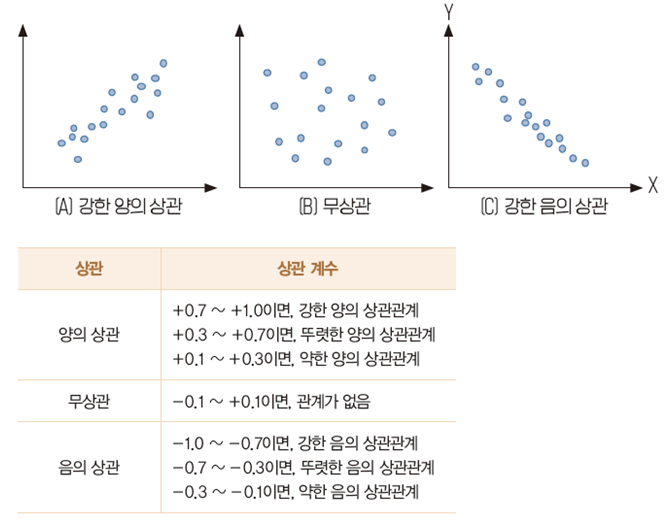

히스토그램으로 데이터의 분포

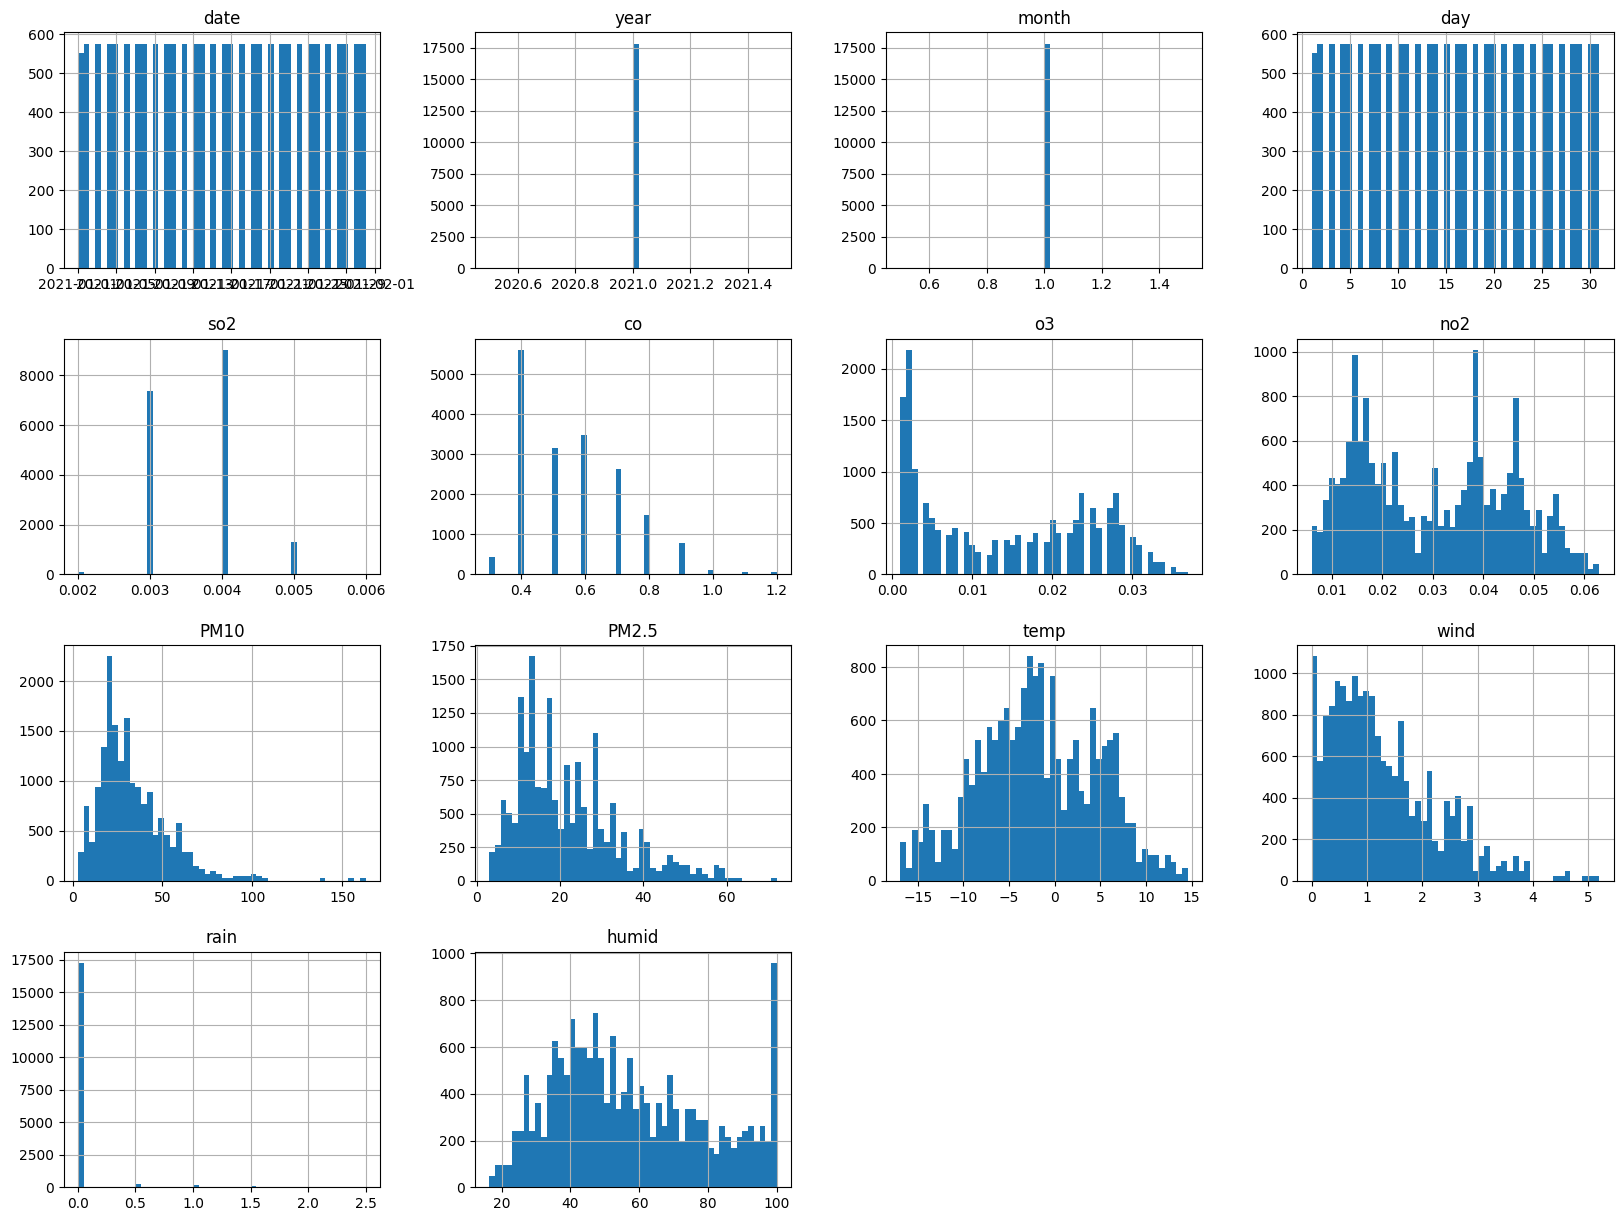

In [58]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

막대그래프로 시각화

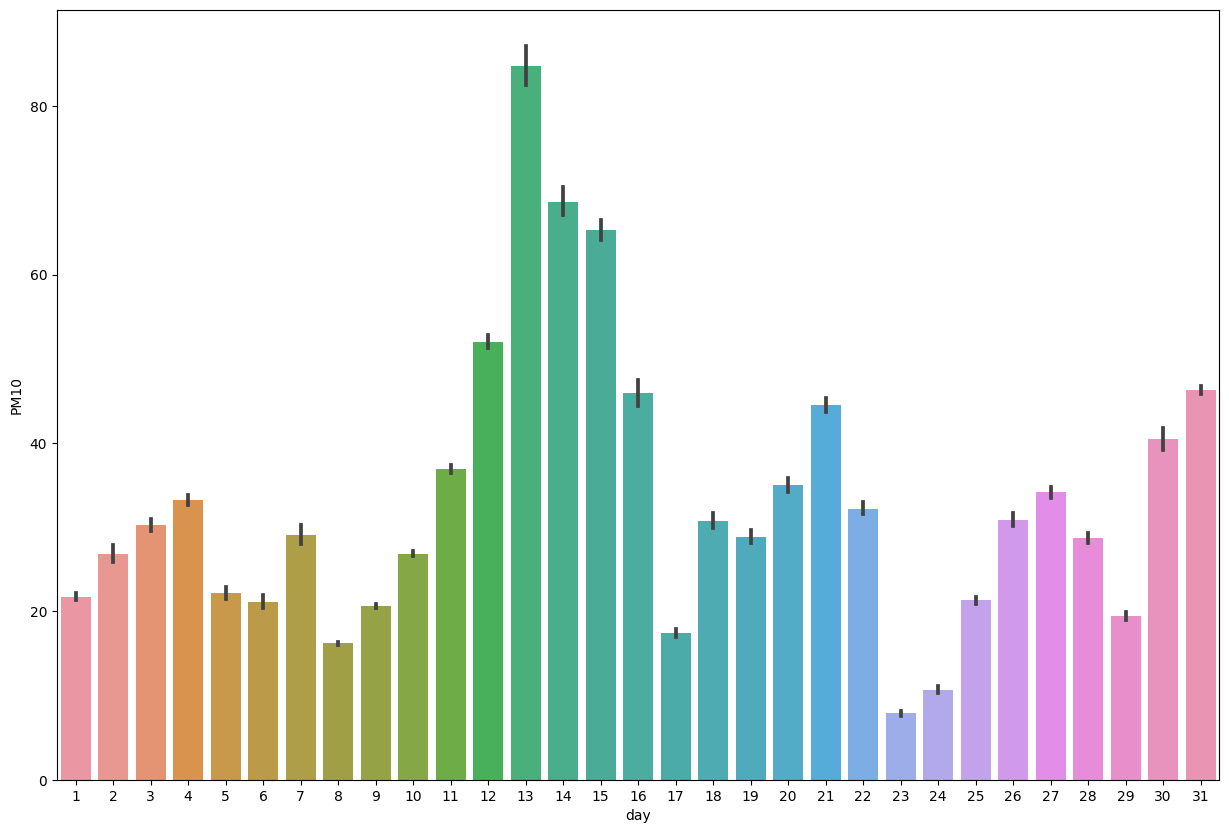

In [59]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.barplot(data=df, x='day',y='PM10')
plt.show()

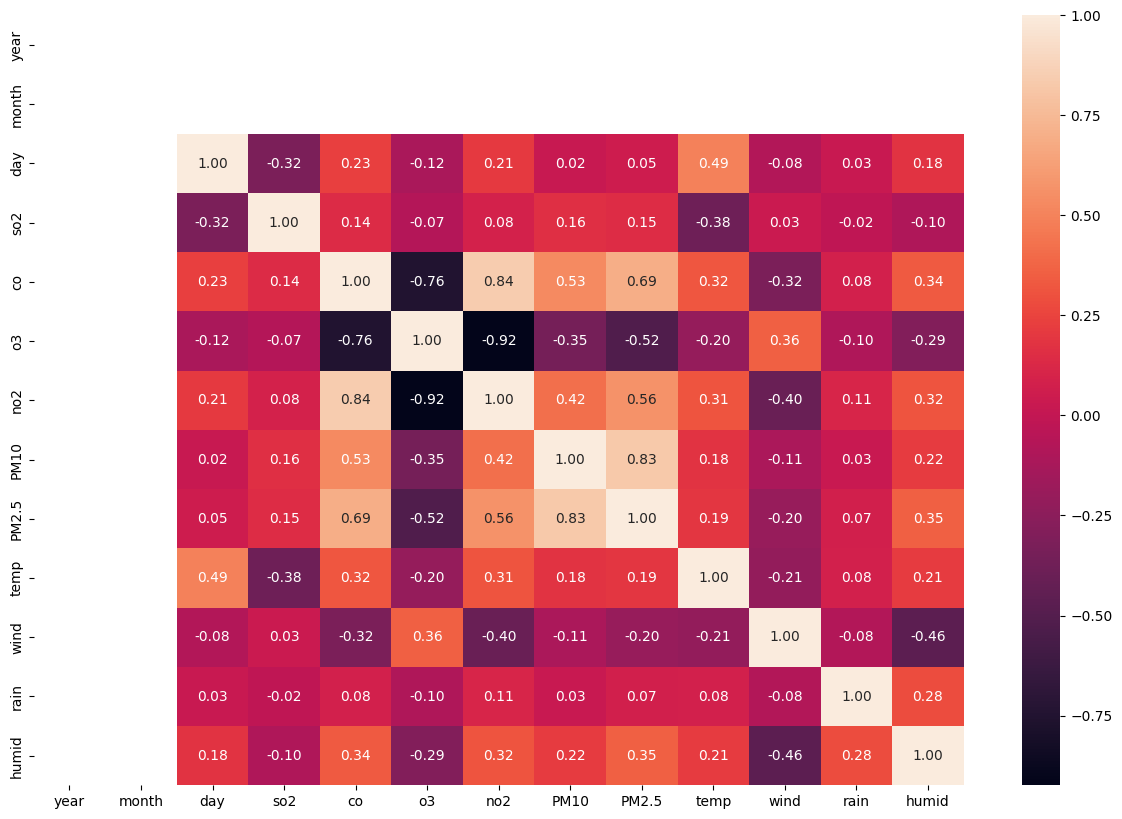

In [63]:
# 히트맵으로 시각화
plt.figure(figsize=(15,10))
sns.heatmap(data=df_corr, annot=True, fmt='.2f')
plt.show()

미세먼지와 바람

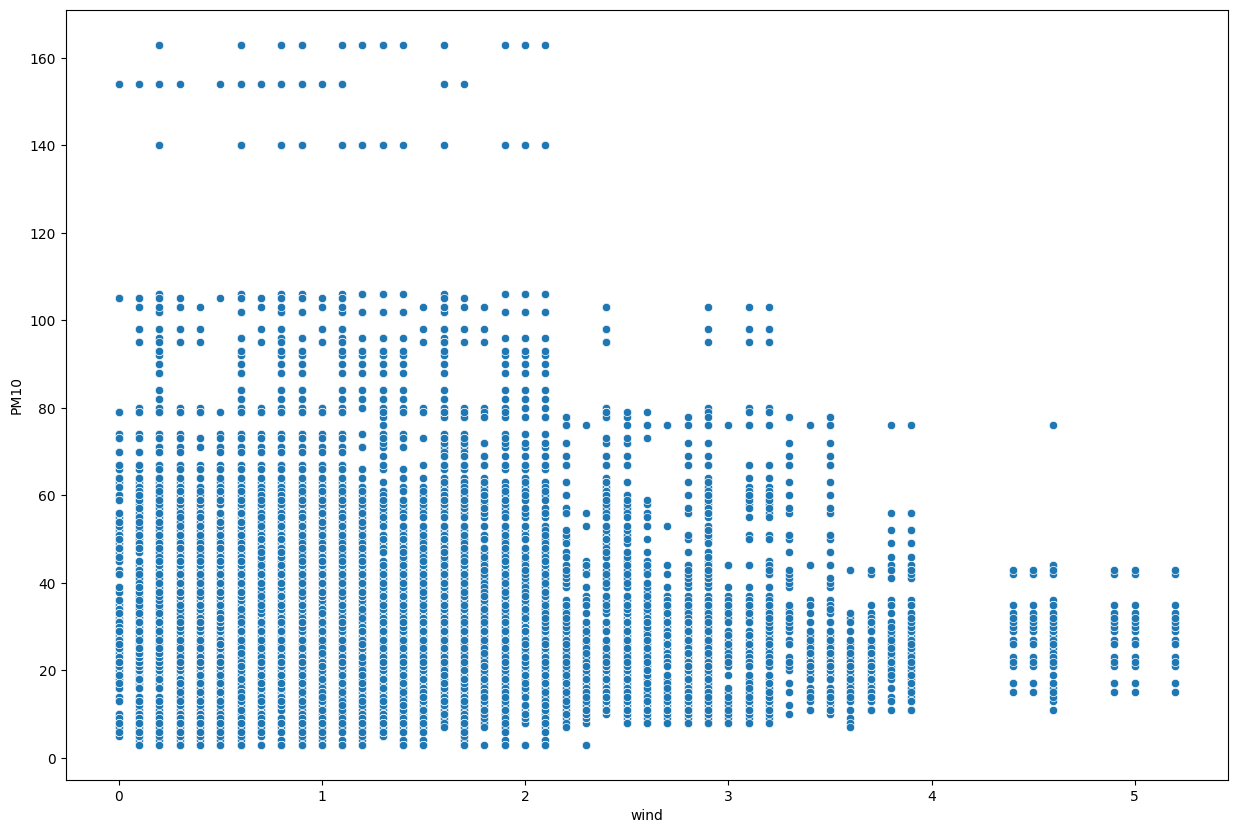

In [64]:
# 산점도
plt.figure(figsize=(15,10))
sns.scatterplot(data = df, x='wind', y='PM10')
plt.show()

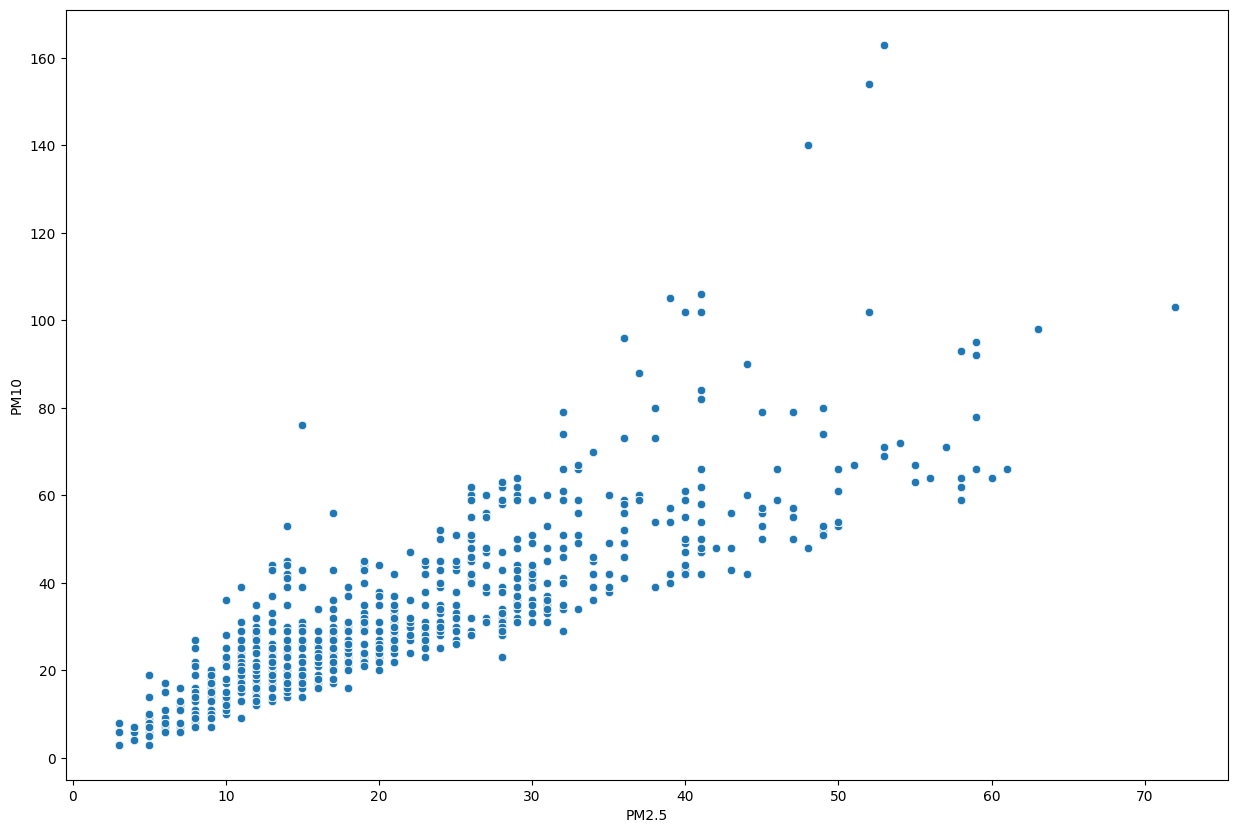

In [65]:
# 산점도
plt.figure(figsize=(15,10))
sns.scatterplot(data = df, x='PM2.5', y='PM10')
plt.show()

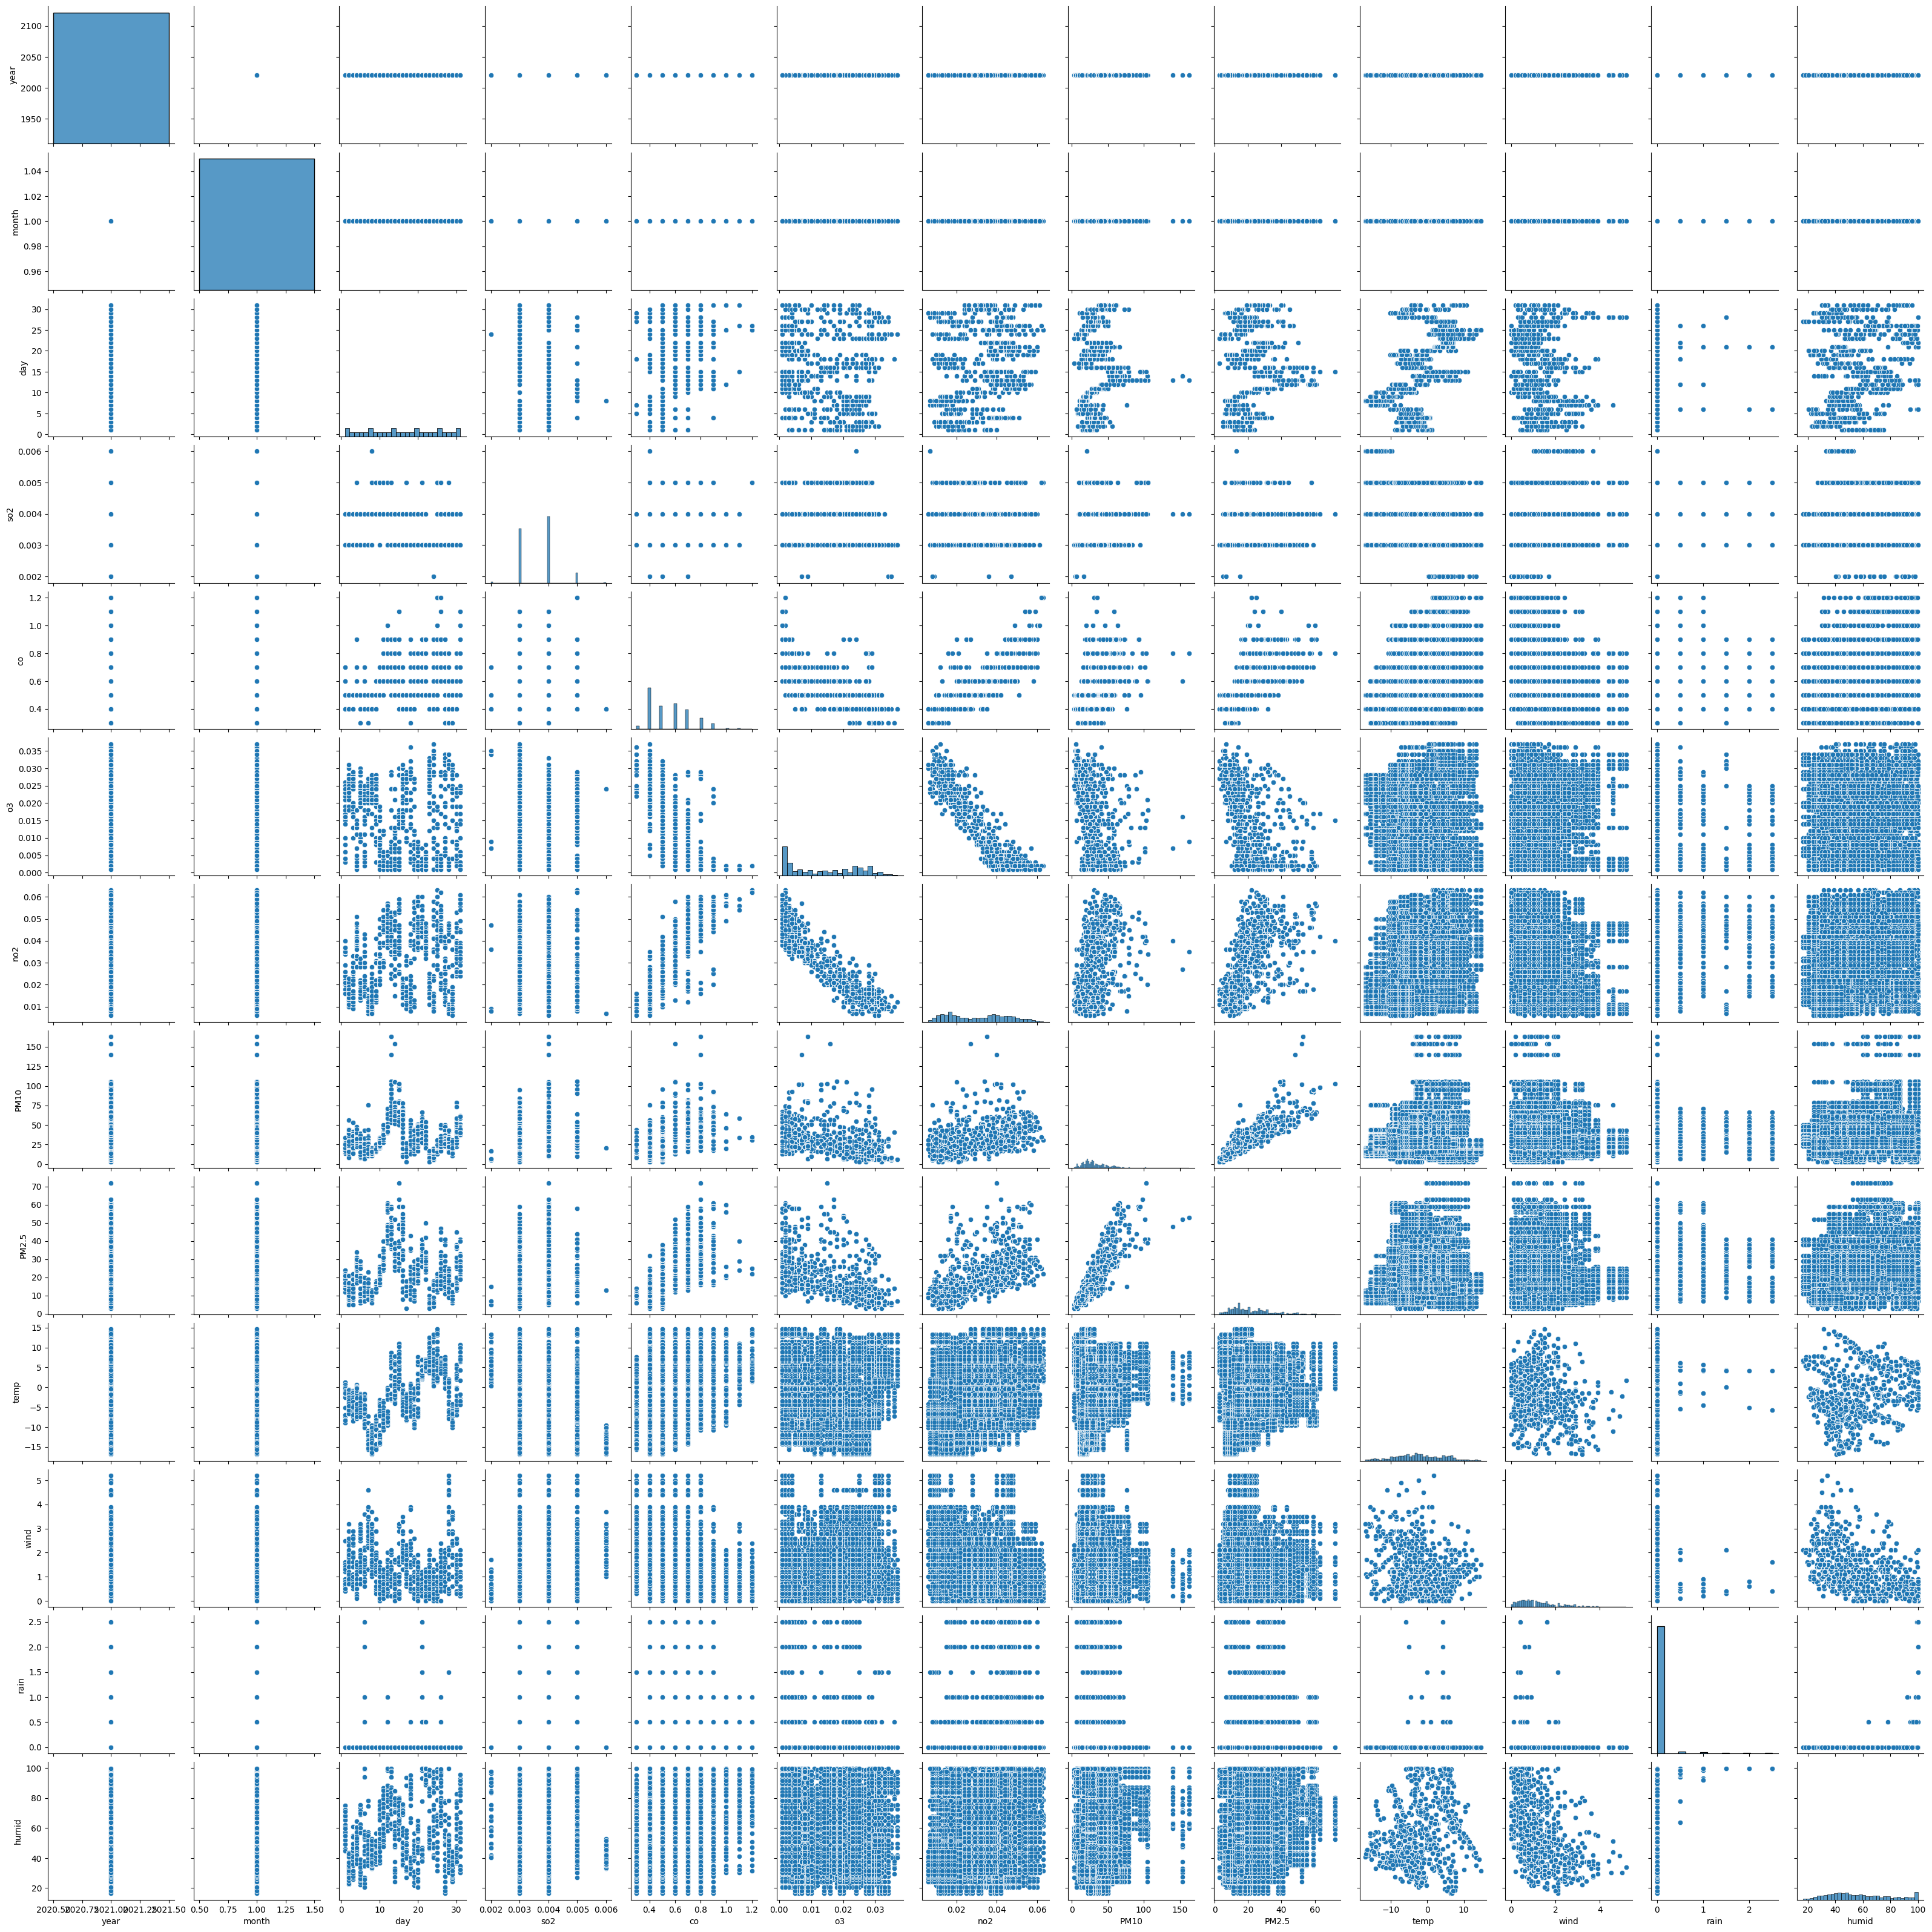

In [66]:
sns.pairplot(df)
plt.show()

- 미세먼지 pm10과 초미세먼지 pm2.5는 강한 상관관계가 있다
- 미세먼지 변수 중 대기오염과 관련된 변수들이 있다
- 일산화탄소(co)와 이산화 질소(no2)는 강한상관 관계가 있다
- 오존(o3)와 바람(wind) 약한 상관관계가 있다
- 바람과 미세먼지는 무관하다